In [1]:
from random import random

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Using TensorFlow backend.


In [2]:
data = pd.read_csv("./data/weather_data_visualcrossing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82500 entries, 0 to 82499
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            82500 non-null  object 
 1   datetime        82500 non-null  object 
 2   tempmax         82500 non-null  float64
 3   tempmin         82500 non-null  float64
 4   temp            82500 non-null  float64
 5   feelslikemax    82500 non-null  float64
 6   feelslikemin    82500 non-null  float64
 7   feelslike       82500 non-null  float64
 8   dew             82500 non-null  float64
 9   humidity        82500 non-null  float64
 10  precip          82500 non-null  float64
 11  precipprob      82500 non-null  float64
 12  precipcover     82500 non-null  float64
 13  preciptype      62714 non-null  object 
 14  snow            82500 non-null  float64
 15  snowdepth       82500 non-null  float64
 16  windgust        34022 non-null  float64
 17  windspeed       82500 non-null 

In [3]:
data.head()

,city,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,cloudcover,visibility,solarradiation,solarenergy,sunrise,sunset,moonphase,conditions,longitude,latitude
0,Birmingham,2003-01-01,10.8,3.2,7.9,10.8,-1.0,5.7,7.2,95.4,...,88.7,9.6,NaN,NaN,08:18:24,16:03:53,0.95,"Rain, Partially cloudy",-1.90592,52.4789
1,Birmingham,2003-01-02,8.1,6.1,7.3,7.0,4.6,5.6,6.2,93.2,...,82.2,11.0,NaN,NaN,08:18:15,16:04:59,0.00,"Rain, Partially cloudy",-1.90592,52.4789
2,Birmingham,2003-01-03,5.3,-1.2,2.4,4.2,-5.0,-0.9,1.1,90.9,...,85.6,10.3,NaN,NaN,08:18:04,16:06:07,0.02,"Snow, Rain, Partially cloudy",-1.90592,52.4789
3,Birmingham,2003-01-04,2.9,-2.1,0.2,-0.4,-5.8,-3.1,-1.5,88.7,...,41.2,10.6,NaN,NaN,08:17:49,16:07:18,0.05,"Snow, Rain, Partially cloudy",-1.90592,52.4789
4,Birmingham,2003-01-05,2.8,-4.5,-1.4,1.8,-5.3,-2.0,-2.7,91.2,...,19.2,8.2,NaN,NaN,08:17:30,16:08:32,0.08,"Snow, Rain",-1.90592,52.4789


In [4]:
data = data.drop(['preciptype', 'windgust', 'precipcover', 'precip', 'snow', 'snowdepth', 'precipprob'], axis=1)

In [5]:
data.isna().sum()

city                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
windspeed             0
winddir               0
pressure            910
cloudcover            2
visibility            0
solarradiation    28127
solarenergy       28127
sunrise               0
sunset                0
moonphase             0
conditions            0
longitude             0
latitude              0
dtype: int64

In [6]:
#convert datetime format
datetimeFormat = '%Y-%m-%d'
data['datetime']=pd.to_datetime(data['datetime'], format=datetimeFormat)
data['day'] = data['datetime'].dt.day
data['month'] = data['datetime'].dt.month

In [7]:
def print_column_stats(df, column):
    print("Count  ",df[column].size)
    print("% Null ",df[column].isnull().mean())
    print("Size   ",df[column].unique().size)
    print("Min    ",df[column].min())
    print("1stQrt ",df[column].quantile(0.25))
    print("Mean   ",df[column].mean())
    print("Median ",df[column].median())
    print("3rdQrt ",df[column].quantile(0.75))
    print("95%    ",df[column].mean()+1.96*df[column].std())
    print("Max    ",df[column].max())
    print("Std    ",df[column].std())

In [8]:
print_column_stats(data, 'pressure')

Count   82500
% Null  0.011030303030303031
Size    775
Min     936.0
1stQrt  1007.9
Mean    1014.514608407893
Median  1015.5
3rdQrt  1022.1
95%     1036.3867274653562
Max     1048.5
Std     11.159244417073129


In [9]:
print_column_stats(data, 'solarradiation')
print_column_stats(data, 'solarenergy')


Count   82500
% Null  0.3409333333333333
Size    3645
Min     1.8
1stQrt  41.1
Mean    126.19941882919832
Median  106.5
3rdQrt  197.3
95%     311.1782073655594
Max     610.3
Std     94.37693292671482
Count   82500
% Null  0.3409333333333333
Size    371
Min     0.0
1stQrt  3.5
Mean    10.884744266455776
Median  9.2
3rdQrt  17.0
95%     26.874681338705848
Max     52.6
Std     8.15813115931126


In [10]:
median_values = data.groupby(['city', 'month'])['solarradiation', 'solarenergy', 'pressure'].median()
median_values

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


solarradiation  solarenergy  pressure
city       month                                       
Birmingham 1               26.05         2.20   1014.70
           2               54.00         4.60   1016.50
           3              102.55         8.80   1015.30
           4              182.50        15.70   1016.15
           5              216.05        18.60   1016.30
...                          ...          ...       ...
Plymouth   8              209.50        18.10   1016.65
           9              150.80        13.05   1018.40
           10              89.70         7.80   1015.45
           11              39.85         3.40   1014.20
           12              24.50         2.10   1016.60

[132 rows x 3 columns]

In [11]:
data['solarradiation'] = data['solarradiation'].fillna(data.apply(lambda row: median_values.loc[(row['city'], row['month']), 'solarradiation'], axis=1))
data['solarenergy'] = data['solarenergy'].fillna(data.apply(lambda row: median_values.loc[(row['city'], row['month']), 'solarenergy'], axis=1))
data['pressure'] = data['pressure'].fillna(data.apply(lambda row: median_values.loc[(row['city'], row['month']), 'solarenergy'], axis=1))

In [12]:
data = data.dropna()
data.isna().sum()

city              0
datetime          0
tempmax           0
tempmin           0
temp              0
feelslikemax      0
feelslikemin      0
feelslike         0
dew               0
humidity          0
windspeed         0
winddir           0
pressure          0
cloudcover        0
visibility        0
solarradiation    0
solarenergy       0
sunrise           0
sunset            0
moonphase         0
conditions        0
longitude         0
latitude          0
day               0
month             0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82498 entries, 0 to 82499
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   city            82498 non-null  object        
 1   datetime        82498 non-null  datetime64[ns]
 2   tempmax         82498 non-null  float64       
 3   tempmin         82498 non-null  float64       
 4   temp            82498 non-null  float64       
 5   feelslikemax    82498 non-null  float64       
 6   feelslikemin    82498 non-null  float64       
 7   feelslike       82498 non-null  float64       
 8   dew             82498 non-null  float64       
 9   humidity        82498 non-null  float64       
 10  windspeed       82498 non-null  float64       
 11  winddir         82498 non-null  float64       
 12  pressure        82498 non-null  float64       
 13  cloudcover      82498 non-null  float64       
 14  visibility      82498 non-null  float64       
 15  so

In [14]:
data.head()

,city,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,sunrise,sunset,moonphase,conditions,longitude,latitude,day,month
0,Birmingham,2003-01-01,10.8,3.2,7.9,10.8,-1.0,5.7,7.2,95.4,...,26.05,2.2,08:18:24,16:03:53,0.95,"Rain, Partially cloudy",-1.90592,52.4789,1,1
1,Birmingham,2003-01-02,8.1,6.1,7.3,7.0,4.6,5.6,6.2,93.2,...,26.05,2.2,08:18:15,16:04:59,0.00,"Rain, Partially cloudy",-1.90592,52.4789,2,1
2,Birmingham,2003-01-03,5.3,-1.2,2.4,4.2,-5.0,-0.9,1.1,90.9,...,26.05,2.2,08:18:04,16:06:07,0.02,"Snow, Rain, Partially cloudy",-1.90592,52.4789,3,1
3,Birmingham,2003-01-04,2.9,-2.1,0.2,-0.4,-5.8,-3.1,-1.5,88.7,...,26.05,2.2,08:17:49,16:07:18,0.05,"Snow, Rain, Partially cloudy",-1.90592,52.4789,4,1
4,Birmingham,2003-01-05,2.8,-4.5,-1.4,1.8,-5.3,-2.0,-2.7,91.2,...,26.05,2.2,08:17:30,16:08:32,0.08,"Snow, Rain",-1.90592,52.4789,5,1


In [15]:
data['conditions'].value_counts()

Rain, Partially cloudy          52159
Partially cloudy                17349
Snow, Rain, Partially cloudy     4766
Rain, Overcast                   3696
Clear                            1895
Overcast                         1124
Rain                              603
Snow, Partially cloudy            357
Snow, Rain, Overcast              315
Snow, Rain                        157
Snow                               58
Snow, Overcast                     19
Name: conditions, dtype: int64

In [16]:
weather_merge_dict = {
    'Rain, Partially cloudy': 'Rain',
    'Rain, Overcast': 'Rain',
    'Snow, Rain, Overcast': 'Snow',
    'Snow, Rain, Partially cloudy': 'Snow',
    'Snow, Overcast': 'Snow',
    'Snow, Partially cloudy': 'Partially cloudy',
    'Snow, Rain': 'Rain'
}
data['conditions'] = data['conditions'].replace(weather_merge_dict)
data['conditions'].value_counts()


Rain                56615
Partially cloudy    17706
Snow                 5158
Clear                1895
Overcast             1124
Name: conditions, dtype: int64

,city,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,...,cloudcover,visibility,solarradiation,solarenergy,moonphase,conditions,longitude,latitude,day,month
0,Birmingham,10.8,3.2,7.9,10.8,-1.0,5.7,7.2,95.4,24.8,...,88.7,9.6,26.05,2.2,0.95,3,-1.90592,52.4789,1,1
1,Birmingham,8.1,6.1,7.3,7.0,4.6,5.6,6.2,93.2,17.9,...,82.2,11.0,26.05,2.2,0.00,3,-1.90592,52.4789,2,1
2,Birmingham,5.3,-1.2,2.4,4.2,-5.0,-0.9,1.1,90.9,20.6,...,85.6,10.3,26.05,2.2,0.02,4,-1.90592,52.4789,3,1
3,Birmingham,2.9,-2.1,0.2,-0.4,-5.8,-3.1,-1.5,88.7,15.7,...,41.2,10.6,26.05,2.2,0.05,4,-1.90592,52.4789,4,1
4,Birmingham,2.8,-4.5,-1.4,1.8,-5.3,-2.0,-2.7,91.2,7.9,...,19.2,8.2,26.05,2.2,0.08,3,-1.90592,52.4789,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82495,Plymouth,18.1,13.1,15.5,18.1,13.1,15.5,13.3,87.0,29.9,...,89.7,19.4,287.00,24.6,0.75,3,-4.13663,50.3762,10,7
82496,Plymouth,17.9,13.8,15.4,17.9,13.8,15.4,13.4,88.0,28.4,...,88.5,19.9,238.80,20.5,0.78,3,-4.13663,50.3762,11,7
82497,Plymouth,18.8,12.6,15.6,18.8,12.6,15.6,11.6,77.9,30.2,...,52.1,22.5,311.00,26.6,0.81,3,-4.13663,50.3762,12,7
82498,Plymouth,18.7,13.3,15.9,18.7,13.3,15.9,13.9,88.2,22.0,...,90.4,16.0,132.80,11.5,0.85,1,-4.13663,50.3762,13,7


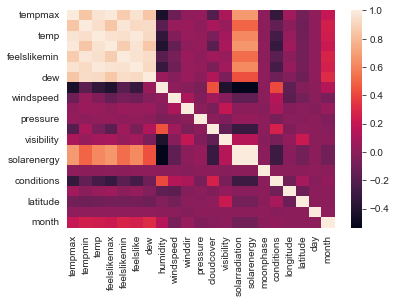

In [18]:
df = data.drop(['datetime', 'sunrise', 'sunset'], axis=1)

label_encoder = LabelEncoder()
df['conditions'] = label_encoder.fit_transform(df['conditions'])

sns.heatmap(df.corr())
df

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82498 entries, 0 to 82499
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            82498 non-null  object 
 1   tempmax         82498 non-null  float64
 2   tempmin         82498 non-null  float64
 3   temp            82498 non-null  float64
 4   feelslikemax    82498 non-null  float64
 5   feelslikemin    82498 non-null  float64
 6   feelslike       82498 non-null  float64
 7   dew             82498 non-null  float64
 8   humidity        82498 non-null  float64
 9   windspeed       82498 non-null  float64
 10  winddir         82498 non-null  float64
 11  pressure        82498 non-null  float64
 12  cloudcover      82498 non-null  float64
 13  visibility      82498 non-null  float64
 14  solarradiation  82498 non-null  float64
 15  solarenergy     82498 non-null  float64
 16  moonphase       82498 non-null  float64
 17  conditions      82498 non-null 

In [20]:
import plotly.express as px
import plotly
fig_city = px.scatter_geo(data, lat='latitude', lon='longitude',
                      hover_name=data['city'],
                      scope="europe",
                      title ='Cities in this Dataset')
plotly.offline.plot(fig_city,filename = './imgs/fig_city.html')

'./imgs/fig_city.html'

In [21]:
import plotly.graph_objects as go

df_grouped = data.groupby(['month', 'conditions']).size().reset_index(name='count')
conditions = df_grouped['conditions'].unique()
fig_month = fig = go.Figure()

for condition in conditions:
    _data = df_grouped[df_grouped['conditions'] == condition]
    fig_month.add_trace(go.Bar(x=_data['month'], y=_data['count'], name=condition))


fig_month.update_layout(
    title='Weather Distribution by Month',
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of Days')
)
plotly.offline.plot(fig_month,filename = './imgs/fig_month.html')

'./imgs/fig_month.html'

In [22]:
import plotly.graph_objects as go

df_grouped = data.groupby(['city', 'conditions']).size().reset_index(name='count')
conditions = df_grouped['conditions'].unique()
fig_city_condition = go.Figure()

for condition in conditions:
    _data = df_grouped[df_grouped['conditions'] == condition]
    fig_city_condition.add_trace(go.Bar(x=_data['city'], y=_data['count'], name=condition))


fig_city_condition.update_layout(
    title='Weather Distribution by City',
    xaxis=dict(title='city'),
    yaxis=dict(title='Number of Days')
)
plotly.offline.plot(fig_city_condition,filename = './imgs/fig_city_condition.html')

'./imgs/fig_city_condition.html'

In [23]:
df_grouped = data.groupby(['city', 'conditions', 'latitude', 'longitude']).size().reset_index(name='count')
conditions = df_grouped['conditions'].unique()

_data = df_grouped[df_grouped['conditions'] == 'Rain']

fig_rain = px.scatter_geo(_data, lat='latitude', lon='longitude',
                      color="count",
                      hover_name=_data['city'],
                      color_continuous_scale='dense',
                      scope="europe",
                      title ='City Wide Rainy Days Percentage Each Year from 2016 to 2022')
plotly.offline.plot(fig_rain,filename = './imgs/fig_rain.html')

'./imgs/fig_rain.html'

In [24]:
_data = df_grouped[df_grouped['conditions'] == 'Partially cloudy']

fig_rain = px.scatter_geo(_data, lat='latitude', lon='longitude',
                      color="count",
                      hover_name=_data['city'],
                      color_continuous_scale='dense',
                      scope="europe",
                      title ='City Wide Rainy Days Percentage Each Year from 2016 to 2022')
plotly.offline.plot(fig_rain,filename = './imgs/fig_partially_cloudy.html')

'./imgs/fig_partially_cloudy.html'

In [25]:
_data = df_grouped[df_grouped['conditions'] == 'Snow']

fig_rain = px.scatter_geo(_data, lat='latitude', lon='longitude',
                      color="count",
                      hover_name=_data['city'],
                      color_continuous_scale='dense',
                      scope="europe",
                      title ='City Wide Rainy Days Percentage Each Year from 2016 to 2022')
plotly.offline.plot(fig_rain,filename = './imgs/fig_snow.html')

'./imgs/fig_snow.html'

In [26]:
_data = df_grouped[df_grouped['conditions'] == 'Clear']

fig_rain = px.scatter_geo(_data, lat='latitude', lon='longitude',
                      color="count",
                      hover_name=_data['city'],
                      color_continuous_scale='dense',
                      scope="europe",
                      title ='City Wide Rainy Days Percentage Each Year from 2016 to 2022')
plotly.offline.plot(fig_rain,filename = './imgs/fig_clear.html')

'./imgs/fig_clear.html'

In [20]:
correlation = df.corr()
influence_order = correlation['conditions'].sort_values(ascending=False)
print(influence_order)

conditions        1.000000
humidity          0.417665
cloudcover        0.271322
windspeed         0.149780
winddir           0.112177
latitude          0.095146
month             0.025311
moonphase        -0.007959
day              -0.008131
visibility       -0.063052
pressure         -0.064456
longitude        -0.086344
dew              -0.098710
tempmin          -0.152006
feelslikemin     -0.170377
feelslike        -0.258358
temp             -0.259119
solarenergy      -0.291884
solarradiation   -0.292060
feelslikemax     -0.315349
tempmax          -0.322643
Name: conditions, dtype: float64


In [21]:
influence_order_abs = abs(correlation['conditions']).sort_values(ascending=False)
print(influence_order_abs)

conditions        1.000000
humidity          0.417665
tempmax           0.322643
feelslikemax      0.315349
solarradiation    0.292060
solarenergy       0.291884
cloudcover        0.271322
temp              0.259119
feelslike         0.258358
feelslikemin      0.170377
tempmin           0.152006
windspeed         0.149780
winddir           0.112177
dew               0.098710
latitude          0.095146
longitude         0.086344
pressure          0.064456
visibility        0.063052
month             0.025311
day               0.008131
moonphase         0.007959
Name: conditions, dtype: float64


In [22]:
data.head()

,city,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,sunrise,sunset,moonphase,conditions,longitude,latitude,day,month
0,Birmingham,2003-01-01,10.8,3.2,7.9,10.8,-1.0,5.7,7.2,95.4,...,26.05,2.2,08:18:24,16:03:53,0.95,Rain,-1.90592,52.4789,1,1
1,Birmingham,2003-01-02,8.1,6.1,7.3,7.0,4.6,5.6,6.2,93.2,...,26.05,2.2,08:18:15,16:04:59,0.00,Rain,-1.90592,52.4789,2,1
2,Birmingham,2003-01-03,5.3,-1.2,2.4,4.2,-5.0,-0.9,1.1,90.9,...,26.05,2.2,08:18:04,16:06:07,0.02,Snow,-1.90592,52.4789,3,1
3,Birmingham,2003-01-04,2.9,-2.1,0.2,-0.4,-5.8,-3.1,-1.5,88.7,...,26.05,2.2,08:17:49,16:07:18,0.05,Snow,-1.90592,52.4789,4,1
4,Birmingham,2003-01-05,2.8,-4.5,-1.4,1.8,-5.3,-2.0,-2.7,91.2,...,26.05,2.2,08:17:30,16:08:32,0.08,Rain,-1.90592,52.4789,5,1


In [20]:
X = df.drop(['conditions', 'city', 'day', 'moonphase'], axis=1)
y = df['conditions']  # weather condition
X

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,pressure,cloudcover,visibility,solarradiation,solarenergy,longitude,latitude,month
0,10.8,3.2,7.9,10.8,-1.0,5.7,7.2,95.4,24.8,171.6,993.2,88.7,9.6,26.05,2.2,-1.90592,52.4789,1
1,8.1,6.1,7.3,7.0,4.6,5.6,6.2,93.2,17.9,240.6,985.5,82.2,11.0,26.05,2.2,-1.90592,52.4789,1
2,5.3,-1.2,2.4,4.2,-5.0,-0.9,1.1,90.9,20.6,13.5,998.6,85.6,10.3,26.05,2.2,-1.90592,52.4789,1
3,2.9,-2.1,0.2,-0.4,-5.8,-3.1,-1.5,88.7,15.7,339.5,1014.5,41.2,10.6,26.05,2.2,-1.90592,52.4789,1
4,2.8,-4.5,-1.4,1.8,-5.3,-2.0,-2.7,91.2,7.9,332.0,1015.9,19.2,8.2,26.05,2.2,-1.90592,52.4789,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82495,18.1,13.1,15.5,18.1,13.1,15.5,13.3,87.0,29.9,196.3,1013.5,89.7,19.4,287.00,24.6,-4.13663,50.3762,7
82496,17.9,13.8,15.4,17.9,13.8,15.4,13.4,88.0,28.4,229.9,1006.9,88.5,19.9,238.80,20.5,-4.13663,50.3762,7
82497,18.8,12.6,15.6,18.8,12.6,15.6,11.6,77.9,30.2,277.4,1012.7,52.1,22.5,311.00,26.6,-4.13663,50.3762,7
82498,18.7,13.3,15.9,18.7,13.3,15.9,13.9,88.2,22.0,208.3,1014.9,90.4,16.0,132.80,11.5,-4.13663,50.3762,7


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.10759163, -1.00192273, -1.15480748, ..., -0.09453785,
         0.47996317, -0.70837644],
       [-1.12474585, -1.02215028, -1.23262641, ..., -0.81270409,
         2.01534055,  1.61270081],
       [ 0.98522323,  1.12197015,  1.02412254, ..., -1.51767091,
        -1.44540056, -0.41824178],
       ...,
       [-0.55865659, -0.31418599, -0.39607292, ..., -0.61282818,
         1.3590145 , -1.28864575],
       [ 0.76221837,  0.73764667,  0.81012049, ..., -1.06052308,
        -1.23222953,  0.16202753],
       [-0.67873613, -1.73011458, -1.17426221, ...,  1.6847535 ,
        -0.30776459, -0.99851109]])

In [23]:
from sklearn.utils import class_weight
sw = class_weight.compute_sample_weight(class_weight='balanced',y=y_train)
sw

array([0.29132402, 0.93527953, 0.29132402, ..., 0.29132402, 0.29132402,
       8.782169  ])

In [45]:
y_train_one_hot = to_categorical(y_train, len(label_encoder.classes_))
y_test_one_hot = to_categorical(y_test, len(label_encoder.classes_))

In [34]:
model = MLPClassifier(

                    batch_size=1024,
                    hidden_layer_sizes=(128, 64, 32),
                    random_state=42,
                    verbose=True,
                    learning_rate_init=0.01,
                    max_iter=1000,
                    activation='relu')  
model.fit(X_train_scaled, y_train_one_hot)

Iteration 1, loss = 1.28107380
Iteration 2, loss = 0.96895174
Iteration 3, loss = 0.91064457
Iteration 4, loss = 0.88808489
Iteration 5, loss = 0.87108914
Iteration 6, loss = 0.86257725
Iteration 7, loss = 0.86136712
Iteration 8, loss = 0.85200923
Iteration 9, loss = 0.84335805
Iteration 10, loss = 0.83905466
Iteration 11, loss = 0.83454520
Iteration 12, loss = 0.83579786
Iteration 13, loss = 0.82876237
Iteration 14, loss = 0.83154770
Iteration 15, loss = 0.81922496
Iteration 16, loss = 0.82794636
Iteration 17, loss = 0.81520916
Iteration 18, loss = 0.81270120
Iteration 19, loss = 0.81374043
Iteration 20, loss = 0.80885601
Iteration 21, loss = 0.80823514
Iteration 22, loss = 0.80903125
Iteration 23, loss = 0.80485900
Iteration 24, loss = 0.80451220
Iteration 25, loss = 0.79955001
Iteration 26, loss = 0.79747138
Iteration 27, loss = 0.79351269
Iteration 28, loss = 0.79772246
Iteration 29, loss = 0.79652483
Iteration 30, loss = 0.79057629
Iteration 31, loss = 0.79039555
Iteration 32, los

c:\programdata\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.



MLPClassifier(activation='relu', alpha=0.0001, batch_size=1024, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(128, 64, 32), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [35]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_one_hot, y_pred)
print(y_pred)
print("accuracy：", accuracy)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]
准确率： 0.772


In [24]:
import keras
from keras import backend as K

def precision(y_true, y_pred):
    # Calculates the precision
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    # Calculates the recall
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def fbeta_score(y_true, y_pred, beta=1):
    # Calculates the F score, the weighted harmonic mean of precision and recall.
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def fmeasure(y_true, y_pred):
    # Calculates the f-measure, the harmonic mean of precision and recall.
    return fbeta_score(y_true, y_pred, beta=1)

In [25]:
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Dropout, LayerNormalization
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
mlp_model = Sequential()
mlp_model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(len(label_encoder.classes_), activation='softmax'))
optimizer = Adam(learning_rate=0.001)

callback = [
    EarlyStopping(monitor='val_accuracy',patience=10,mode='max',restore_best_weights=True),
    ModelCheckpoint("./models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='max'),
    TensorBoard(log_dir="./model", histogram_freq=1)
]

# compile model
mlp_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# train model
train_history = mlp_model.fit(X_train_scaled, y_train_one_hot, batch_size=256, epochs=1000, validation_split=0.2, verbose=2, callbacks=callback)
test_loss, test_accuracy = mlp_model.evaluate(X_test_scaled, y_test_one_hot, verbose=2)
print(f"Test Loss = {test_loss}, Test Accuracy = {test_accuracy}")


Epoch 1/1000
Instructions for updating:
use `tf.profiler.experimental.stop` instead.

Epoch 00001: val_accuracy improved from -inf to 0.75864, saving model to ./models\weights-improvement-01-0.76.hdf5
207/207 - 1s - loss: 0.7604 - accuracy: 0.7113 - val_loss: 0.5893 - val_accuracy: 0.7586
Epoch 2/1000

Epoch 00002: val_accuracy improved from 0.75864 to 0.76833, saving model to ./models\weights-improvement-02-0.77.hdf5
207/207 - 1s - loss: 0.6283 - accuracy: 0.7424 - val_loss: 0.5515 - val_accuracy: 0.7683
Epoch 3/1000

Epoch 00003: val_accuracy improved from 0.76833 to 0.76871, saving model to ./models\weights-improvement-03-0.77.hdf5
207/207 - 1s - loss: 0.5944 - accuracy: 0.7530 - val_loss: 0.5374 - val_accuracy: 0.7687
Epoch 4/1000

Epoch 00004: val_accuracy improved from 0.76871 to 0.77492, saving model to ./models\weights-improvement-04-0.77.hdf5
207/207 - 1s - loss: 0.5727 - accuracy: 0.7578 - val_loss: 0.5241 - val_accuracy: 0.7749
Epoch 5/1000

Epoch 00005: val_accuracy improve

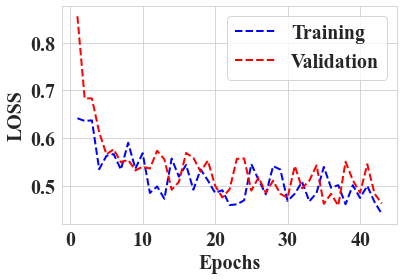

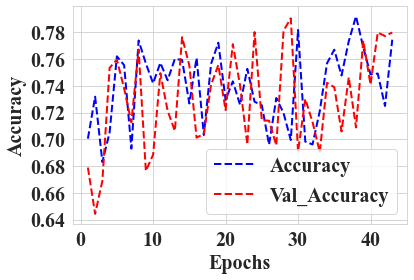

In [36]:
import matplotlib.pyplot as plt
import random
plt.rc('font',family='Times New Roman')
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss[0:], 'blue', label='Training',linestyle="--",linewidth='2')
plt.plot(epochs, val_loss[0:], 'red', label='Validation',linestyle="--",linewidth='2')
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('LOSS',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy[0:], 'blue', label='Accuracy',linestyle="--",linewidth='2')
plt.plot(epochs, val_accuracy[0:], 'red', label='Val_Accuracy',linestyle="--",linewidth='2')
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score, auc, precision_score, recall_score
import numpy as np
def plot_roc(y_scores, y_test_one_hot):
    fpr = {}
    tpr = {}
    roc_auc = {}
    labels = {}
    n_classes = len(label_encoder.classes_)  # Number of categories
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        labels[i] = label_encoder.classes_[i]

    # plot every class roc
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='%s ROC curve (area = %0.2f)' % (labels[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


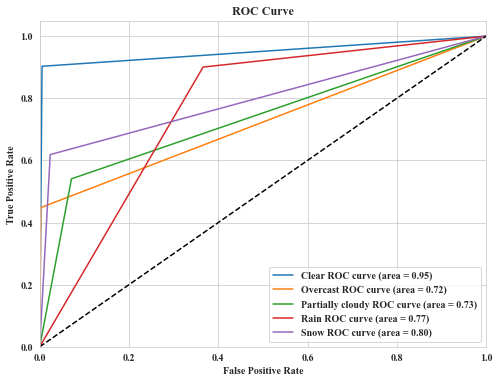

array([[5.1916641e-07, 2.8568249e-05, 1.0087881e-02, 8.1739473e-01,
        1.7248826e-01],
       [2.6732891e-06, 3.1745840e-05, 3.1206135e-02, 6.8693286e-01,
        2.8182656e-01],
       [3.5553272e-05, 2.7839867e-05, 3.3475420e-01, 6.6518241e-01,
        2.3208065e-08],
       ...,
       [8.0461566e-09, 4.5148026e-05, 9.8044379e-03, 9.8995495e-01,
        1.9536926e-04],
       [2.0127960e-04, 5.0284807e-06, 5.1367605e-01, 4.8611742e-01,
        2.5466855e-07],
       [3.8709794e-03, 2.4100322e-05, 5.1885408e-01, 2.6967090e-01,
        2.0757999e-01]], dtype=float32)

In [42]:
y_scores = mlp_model.predict(X_test_scaled)
plot_roc(to_categorical(np.argmax(y_scores , axis=1)), y_test_one_hot)
y_scores

In [43]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, np.argmax(y_scores , axis=1))
cm

array([[  354,     0,     0,    38,     0],
       [    0,    95,     1,   100,    16],
       [    8,     2,  1943,  1514,   126],
       [   68,    29,   804, 10181,   224],
       [    8,     9,   114,   249,   617]], dtype=int64)

<Figure size 1920x1280 with 0 Axes>

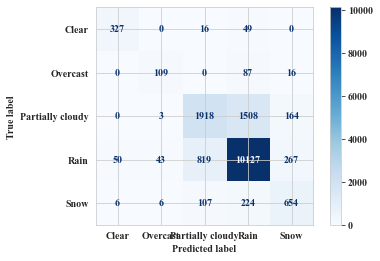

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(dpi=320)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.savefig("cm.png",dpi=400)

In [46]:
import numpy as np

n_steps = 10

def create_sequences(data, n_steps):
    X = []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
    return np.array(X)

# Create sequences for the LSTM input
X_train_lstm = create_sequences(X_train_scaled, n_steps)
X_train_scaled_lstm = X_train_scaled[n_steps:]
y_train_one_hot_lstm = y_train_one_hot[n_steps:]

X_test_lstm = create_sequences(X_test_scaled, n_steps)
X_test_scaled_lstm = X_test_scaled[n_steps:]
y_test_one_hot_lstm = y_test_one_hot[n_steps:]
print(X_train_lstm.shape)
print(X_train_scaled_lstm.shape)

(65988, 10, 18)
(65988, 18)


In [49]:
from keras.callbacks import TensorBoard
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LayerNormalization, LSTM, TimeDistributed, concatenate, Input
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

input_shape_mlp = X_train_scaled.shape[1]

# Define the input shape for the LSTM part of the model
input_shape_lstm = (10, X_train_scaled.shape[1])  # Adjust sequence_length and num_features accordingly

# MLP model
mlp_input = Input(shape=(input_shape_mlp,))
mlp_layer1 = Dense(128, activation='relu')(mlp_input)
mlp_layer1_dropout = Dropout(0.5)(mlp_layer1)
mlp_layer2 = Dense(64, activation='relu')(mlp_layer1_dropout)
mlp_layer2_dropout = Dropout(0.25)(mlp_layer2)

# LSTM model
lstm_input = Input(shape=input_shape_lstm)
lstm_layer = LSTM(64)(lstm_input)

concatenated = concatenate([mlp_layer2_dropout, lstm_layer])

output_layer = Dense(len(label_encoder.classes_), activation='softmax')(concatenated)

combined_model = Model(inputs=[mlp_input, lstm_input], outputs=output_layer)

optimizer = Adam(learning_rate=0.001)


callback = [
    EarlyStopping(monitor='val_accuracy',patience=10,mode='max',restore_best_weights=True),
    ModelCheckpoint("./models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='max'),
    TensorBoard(log_dir="./model", histogram_freq=1)
]


combined_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

lstm_train_history = combined_model.fit([X_train_scaled_lstm, X_train_lstm], y_train_one_hot_lstm, batch_size=256, epochs=1000, validation_split=0.1, verbose=2, callbacks=callback)
test_loss, test_accuracy = combined_model.evaluate([X_test_scaled_lstm, X_test_lstm], y_test_one_hot_lstm, verbose=2)
print(f"Test Loss = {test_loss}, Test Accuracy = {test_accuracy}")

Epoch 1/1000

Epoch 00001: val_accuracy improved from -inf to 0.76209, saving model to ./models\weights-improvement-01-0.76.hdf5
232/232 - 6s - loss: 0.7559 - accuracy: 0.7072 - val_loss: 0.5837 - val_accuracy: 0.7621
Epoch 2/1000

Epoch 00002: val_accuracy improved from 0.76209 to 0.76406, saving model to ./models\weights-improvement-02-0.76.hdf5
232/232 - 5s - loss: 0.6089 - accuracy: 0.7448 - val_loss: 0.5496 - val_accuracy: 0.7641
Epoch 3/1000

Epoch 00003: val_accuracy improved from 0.76406 to 0.77618, saving model to ./models\weights-improvement-03-0.78.hdf5
232/232 - 5s - loss: 0.5809 - accuracy: 0.7518 - val_loss: 0.5330 - val_accuracy: 0.7762
Epoch 4/1000

Epoch 00004: val_accuracy improved from 0.77618 to 0.77875, saving model to ./models\weights-improvement-04-0.78.hdf5
232/232 - 4s - loss: 0.5651 - accuracy: 0.7552 - val_loss: 0.5172 - val_accuracy: 0.7788
Epoch 5/1000

Epoch 00005: val_accuracy improved from 0.77875 to 0.77997, saving model to ./models\weights-improvement-

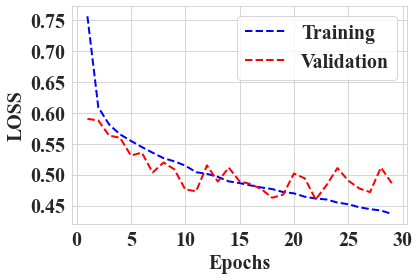

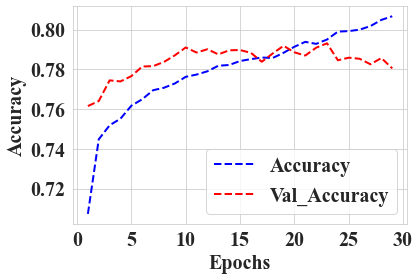

In [67]:
import matplotlib.pyplot as plt
import  random
plt.rc('font',family='Times New Roman')
loss = lstm_train_history.history['loss']
val_loss = lstm_train_history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss[0:], 'blue', label='Training',linestyle="--",linewidth='2')
plt.plot(epochs, val_loss[0:], 'red', label='Validation',linestyle="--",linewidth='2')
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('LOSS',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

accuracy = lstm_train_history.history['accuracy']
val_accuracy = lstm_train_history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy[0:], 'blue', label='Accuracy',linestyle="--",linewidth='2')
plt.plot(epochs, val_accuracy[0:], 'red', label='Val_Accuracy',linestyle="--",linewidth='2')
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [118]:
mlp_model.save("./models/0.79.h5")

In [33]:
y_scores = combined_model.predict([X_test_scaled_lstm, X_test_lstm])

<Figure size 1920x1280 with 0 Axes>

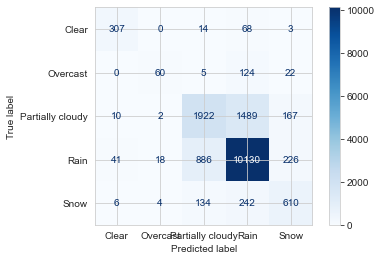

In [30]:
y_scores = combined_model.predict([X_test_scaled_lstm, X_test_lstm])
cm = confusion_matrix(np.argmax(y_test_one_hot_lstm,axis=1), np.argmax(y_scores , axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(dpi=320)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.savefig("cm_lstm.png",dpi=400)

In [47]:
np.argmax(y_test_one_hot_lstm,axis=1)

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [34]:
print(f'precision: {precision(y_test_one_hot_lstm, y_scores)}')

precision: 0.8068661093711853


In [35]:
print(f'recall: {recall(y_test_one_hot_lstm, y_scores)}')

recall: 0.7539721131324768


In [50]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, criterion="gini")
rf_model.fit(X_train_scaled, y_train_one_hot)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

准确率： 0.7303030303030303
precision： tf.Tensor(0.8244954, shape=(), dtype=float32)
recall:  tf.Tensor(0.73030305, shape=(), dtype=float32)


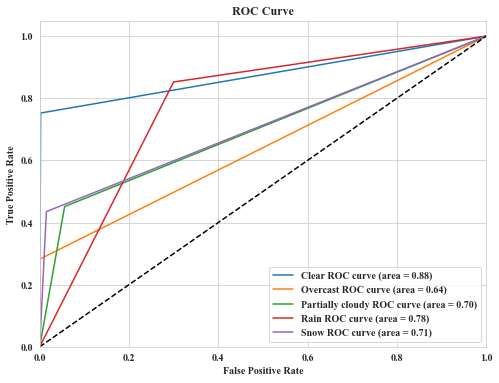

In [51]:
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_one_hot, y_pred)
plot_roc(y_pred, y_test_one_hot)
print("accuracy：", accuracy)
print("precision：", precision(y_test_one_hot, y_pred))
print("recall: ", recall(y_test_one_hot, y_pred))

In [52]:
y_pred

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

<Figure size 1920x1280 with 0 Axes>

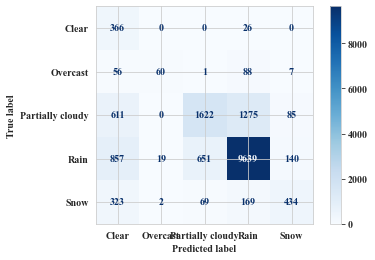

In [53]:
cm = confusion_matrix(y_test, np.argmax(y_pred , axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(dpi=320)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.savefig("cm_lstm.png",dpi=400)

In [54]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=len(label_encoder.classes_)).fit(X_train_scaled,y_train_one_hot)

准确率： 0.7511515151515151
precision： tf.Tensor(0.78116727, shape=(), dtype=float32)
recall:  tf.Tensor(0.7511515, shape=(), dtype=float32)


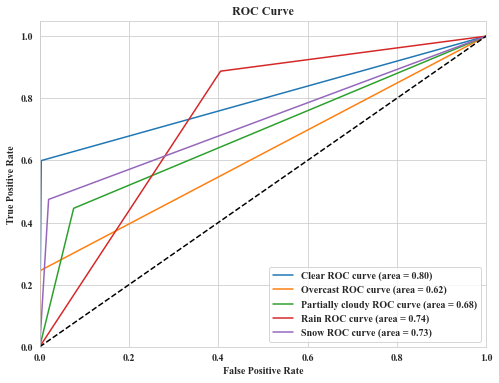

In [55]:
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_one_hot, y_pred)
plot_roc(y_pred, y_test_one_hot)
print("accuracy：", accuracy)
print("precision：", precision(y_test_one_hot, y_pred))
print("recall: ", recall(y_test_one_hot, y_pred))

<Figure size 1920x1280 with 0 Axes>

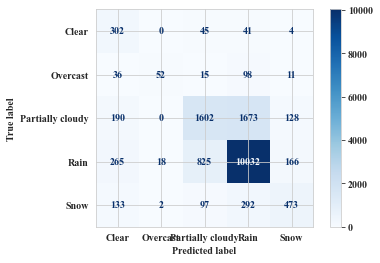

In [56]:
cm = confusion_matrix(y_test, np.argmax(y_pred , axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(dpi=320)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.savefig("cm_lstm.png",dpi=400)

In [57]:
def plot_roc_origin_data(y_scores, y_test_one_hot):
    fpr = {}
    tpr = {}
    roc_auc = {}
    labels = {}
    # num of class
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], list(map(lambda x: 1 if x == i else 0, y_scores)))
        roc_auc[i] = auc(fpr[i], tpr[i])
        labels[i] = label_encoder.classes_[i]

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='%s ROC curve (area = %0.2f)' % (labels[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [58]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)


c:\programdata\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

准确率： 0.7695757575757576
precision： 0.7695757575757576
recall:  0.7695757575757576


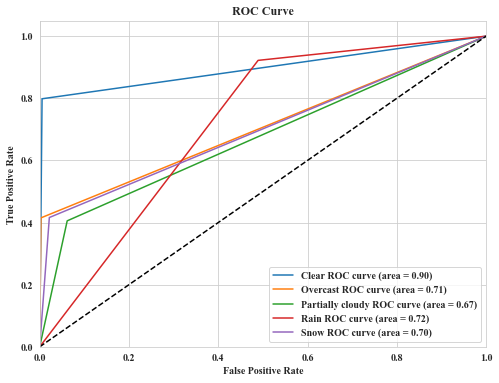

In [59]:
y_pred = lr_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
plot_roc_origin_data(y_pred, y_test_one_hot)
print("accuracy：", accuracy)
print("precision：", precision_score(y_test, y_pred ,average='micro'))
print("recall: ", recall_score(y_test, y_pred, average='micro'))

<Figure size 1920x1280 with 0 Axes>

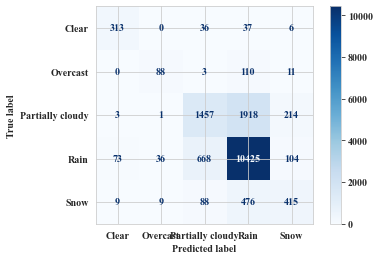

In [61]:
cm = confusion_matrix(y_test, y_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(dpi=320)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.savefig("cm_lstm.png",dpi=400)

In [62]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB().fit(X_train_scaled, y_train)


准确率： 0.6487878787878788
precision： 0.6487878787878788
recall:  0.6487878787878788


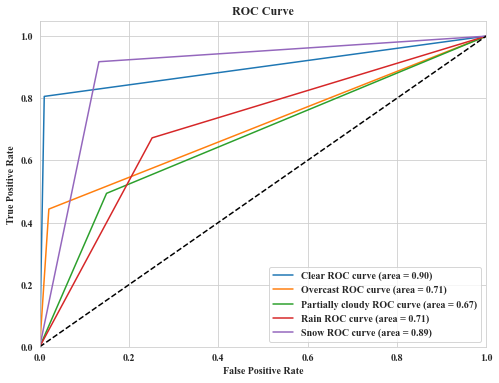

In [63]:
y_pred = gnb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
plot_roc_origin_data(y_pred, y_test_one_hot)
print("accuracy：", accuracy)
print("precision：", precision_score(y_test, y_pred ,average='micro'))
print("recall: ", recall_score(y_test, y_pred, average='micro'))

<Figure size 1920x1280 with 0 Axes>

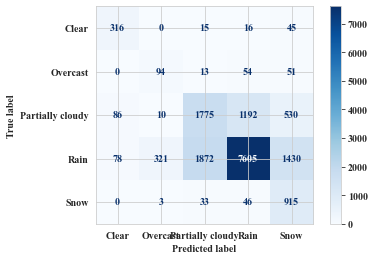

In [64]:
cm = confusion_matrix(y_test, y_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
plt.figure(dpi=320)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.savefig("cm_lstm.png",dpi=400)